In [12]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid') 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last_expr"

In [59]:
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv("data.csv")

In [ ]:
fighters = pd.read_csv("fighters.csv")
categories_data = pd.read_csv("categories.csv")
fighter_mean = pd.read_csv("fighter_means.csv")
data_edited = pd.read_csv("data_edited.csv")

In [ ]:
names = data["B_Name"].unique()
lower_names = [name.lower() for name in names]
np.savetxt('fighters.csv', lower_names, delimiter=',', fmt='%s', header='Fighters', comments='')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.describe(include=['object']) 

In [47]:
#data.fillna(value=0, inplace=True)
columns_to_fill = ['B_Age', 'B_Height', 'B_Weight', 'R_Age', 'R_Height', 'R_Weight']
data[columns_to_fill] = data[columns_to_fill].apply(lambda x: x.fillna(x.mean()))

data.loc[:, :] = data.fillna(value=0)

In [48]:
data = data.drop(['Event_ID', 'Fight_ID', 'B_Location', 'B_HomeTown', 'B_ID','B_Name', 'R_Location', 'R_HomeTown','R_ID',
                    'R_Name','winby','Date', 'BStreak', 'Last_round', 'Max_round'], axis=1)

data.rename(columns={'BPrev':'B__Prev',
                        'RPrev':'R__Prev',
                        'B_Age':'B__Age',
                        'B_Height':'B__Height',
                        'B_Weight':'B__Weight',
                        'R_Age':'R__Age',
                        'R_Height':'R__Height',
                        'R_Weight':'R__Weight'}, inplace=True)

In [61]:
data = data[(data["winner"] == "red") | (data["winner"] == "blue")]

In [62]:
data['winner_code'] = data.winner.replace({'red': 0, 'blue': 1}) 

In [9]:
dropdata = data.drop('winner', axis=1)

In [10]:
objecttypes = list(dropdata.select_dtypes(include=['float64']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('float32')

dropdata.to_csv('data_edited.csv', index=False)

In [ ]:
data['R_Name'] = data['R_Name'].str.lower()
data['B_Name'] = data['B_Name'].str.lower()

In [13]:
data_mean = data.drop(['Event_ID', 'Fight_ID', 'B_Location', 'B_HomeTown', 'B_ID', 'R_Location', 'R_HomeTown','R_ID','winby','Date', 'BStreak', 'winner', 'Last_round', 'Max_round'], axis=1)
data_mean.rename(columns={'BPrev':'B__Prev',
                        'RPrev':'R__Prev',
                        'B_Age':'B__Age',
                        'B_Height':'B__Height',
                        'B_Weight':'B__Weight',
                        'R_Age':'R__Age',
                        'R_Height':'R__Height',
                        'R_Weight':'R__Weight',
                        'B_Name': 'B__Name',
                        'R_Name': 'R__Name'}, inplace=True)

combined_all = pd.DataFrame()

for i, name in enumerate(fighters['Fighters']):
    conor = data_mean.loc[ (data_mean['B__Name'] == name)]
    filtered_columns = conor.filter(regex='^R', axis=1)
    conorB = conor.drop(filtered_columns.columns, axis=1)

    new_columns = {col: col.replace("B__", "") for col in conorB.columns if col.startswith("B__")}
    conorB = conorB.rename(columns=new_columns)
    conorB = conorB.drop("Name", axis=1)

    conor = data_mean.loc[ (data_mean['R__Name'] == name)]
    filtered_columns = conor.filter(regex='^B', axis=1)
    conorR = conor.drop(filtered_columns.columns, axis=1)

    new_columns = {col: col.replace("R__", "") for col in conorR.columns if col.startswith("R__")}
    conorR = conorR.rename(columns=new_columns)
    conorR = conorR.drop("Name", axis=1)
    # conorR['Last_round'] = conorR.pop('Last_round')
    # conorR['Max_round'] = conorR.pop('Max_round')
    combined_df = pd.concat([conorR, conorB], ignore_index=True)
    combined_df = combined_df.mean().to_frame().transpose()

    combined_df['Name'] = name
    combined_all = pd.concat([combined_all, combined_df], ignore_index=True)


In [14]:
objecttypes = list(combined_all.select_dtypes(include=['float64']).columns)
for col in objecttypes:
    combined_all[col] = combined_all[col].astype('float32')

combined_all.to_csv('fighter_means.csv', index=False, header=True)


In [ ]:
#data_hist = data.iloc[:, :5].hist(figsize=(10,10), xrot=-45)
data_hist = data.iloc[:, :10]
#sns.histplot(data=data_hist, element='step')

# # Customize the legend
# legend_labels = ['Group A', 'Group B with a long name']


# plt.legend(legend_labels, title='Groups')
# # Adjust the aesthetics of the legend
# legend = plt.gca().get_legend()
# plt.setp(legend.get_title(), fontsize='14', fontweight='bold')
# plt.setp(legend.get_texts(), fontsize='12')

for column in data_hist.columns:
    column_values = data_hist[column].astype(str)
    # Create a new plot for each variable
    sns.histplot(data=column_values)

    plt.title(column)  # Set the title of the plot as the variable name
    plt.xlabel('Value')  # Set the x-axis label
    plt.xticks(rotation='vertical')  # Adjust the rotation angle as needed
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show();  # Display the plot

#plt.show()


In [ ]:
https://www.kaggle.com/code/elitcohen/ufc-fight-data-exploratory-analysis-viz

In [ ]:
#When I Googled some of these fights, most of the 3-round fights were by decision (as opposed to KO/submission) - 
#this means that there was no opportunity for a 4th round. Let's replace any Max_round of 4 with a 3 instead
data[['B_Name', 'R_Name', 'Last_round']][data['Max_round'] == 4]
# replacing Max_round of 4 to 3 instead
df.loc[df['Max_round'] == 4, 'Max_round'] = 3

# print to double check
print('There are', df['Max_round'][df['Max_round'] == 3].size, 'fights with max 3 rounds')
print('There are', df['Max_round'][df['Max_round'] == 4].size, 'fights with max 4 rounds')
print('There are', df['Max_round'][df['Max_round'] == 5].size, 'fights with max 5 rounds')

In [38]:
# find the date of the last fight
data['Date'].max()

'24/10/2015'

In [ ]:
data[['R_Name', 'R_Age', 'Date']][data['R_Name'] == 'jose aldo']

SyntaxError: incomplete input (3628759654.py, line 1)

In [ ]:
df = {  'Name': data['B_Location'].value_counts().head(15).index, 
        'Count': data['B_Location'].value_counts().head(15).values}
df = pd.DataFrame(df)
sns.barplot(data=df, y='Name', x='Count')
plt.show() 

<Axes: xlabel='count', ylabel='winner'>

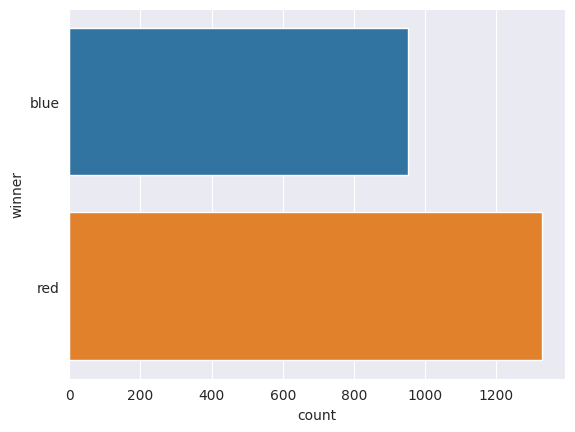

In [63]:
sns.countplot(y='winner', data=data) 
plt.show() 


<Axes: xlabel='count', ylabel='winner_code'>

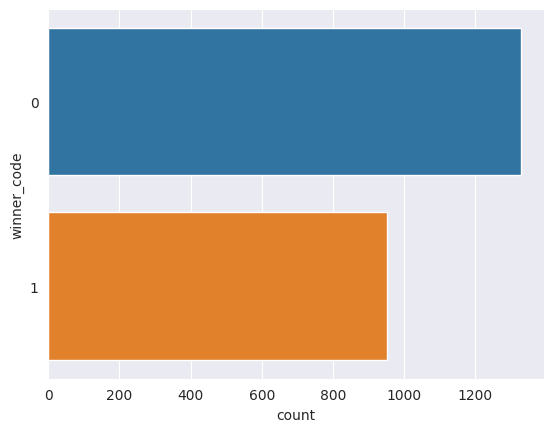

In [64]:
sns.countplot(y='winner_code', data=data) 
plt.show() 

In [ ]:
data = data[(data["winner"] == "red") | (data["winner"] == "blue")]

In [ ]:
#for feature in data.dtypes[data.dtypes == 'object'].index: 
sns.countplot(y='R__Weight', data=dropdata) 
plt.show() 
sns.countplot(y='B__Weight', data=dropdata) 
plt.show() 

In [ ]:
#Basic Correlation Matrix
corrmat = dropdata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
# Subset Correlation Matrix
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
Gradient Boosting Classifier was 
applied with a multinomial deviance loss 
function and a learning rate of 0.01, 
producing the following relative variable 
importances:

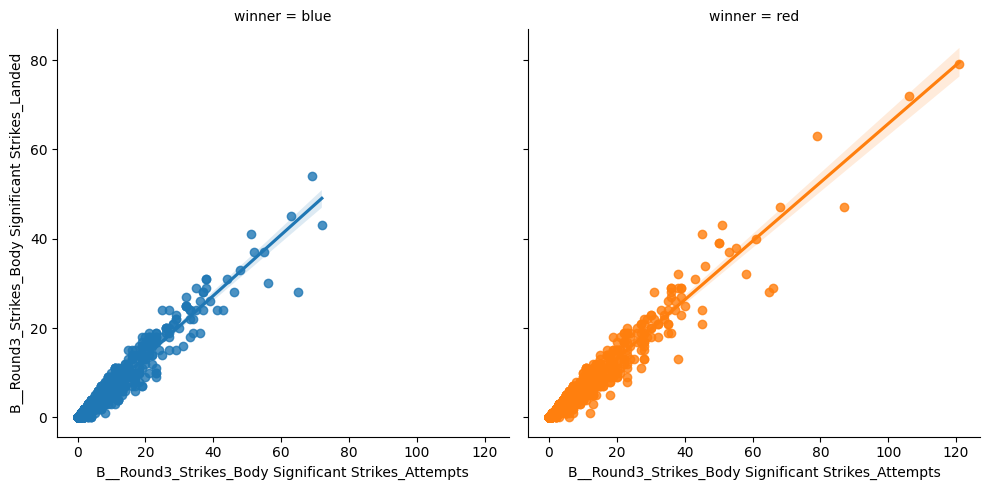

In [34]:
sns.lmplot(x="B__Round3_Strikes_Body Significant Strikes_Attempts", 
            y="B__Round3_Strikes_Body Significant Strikes_Landed", 
            col="winner", hue="winner", data=data, col_wrap=2)